In [50]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\foram\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
df = pd.read_excel('customer_churn_large_dataset.xlsx')
print(df.head()) 
print(df.info())  

In [52]:
df.isnull().sum()
#The data does not have missing values


CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

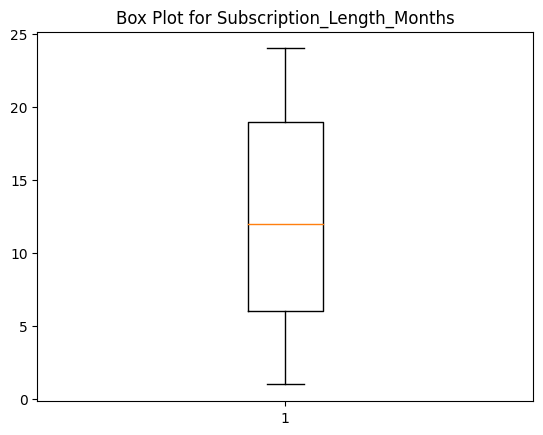

In [54]:
import matplotlib.pyplot as plt

plt.boxplot(df['Subscription_Length_Months'])
plt.title("Box Plot for Subscription_Length_Months")
plt.show()

In [98]:
print(df.describe())

              Gender       Location  Subscription_Length_Months  \
count  100000.000000  100000.000000               100000.000000   
mean        0.497840       1.995840                    0.499570   
std         0.499998       1.411638                    0.301150   
min         0.000000       0.000000                    0.000000   
25%         0.000000       1.000000                    0.217391   
50%         0.000000       2.000000                    0.478261   
75%         1.000000       3.000000                    0.782609   
max         1.000000       4.000000                    1.000000   

        Monthly_Bill  Total_Usage_GB          Churn  \
count  100000.000000   100000.000000  100000.000000   
mean        0.500760        0.498653       0.497790   
std         0.289010        0.289918       0.499998   
min         0.000000        0.000000       0.000000   
25%         0.250571        0.246667       0.000000   
50%         0.500143        0.497778       0.000000   
75%        

 75% people who are not likely to churn are people who are younger than age 57 Use lesser than 387 GB Has subscription for less than 19 months monthly bill less than 82.64 units

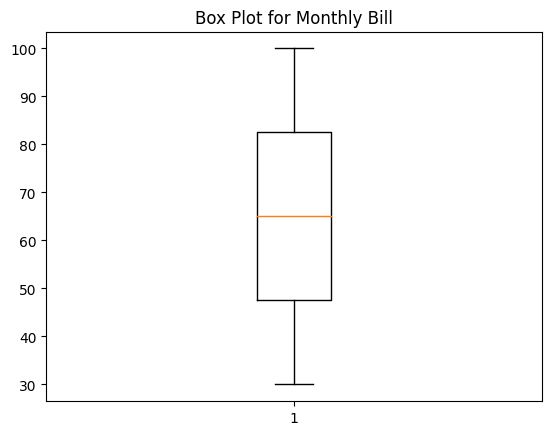

In [55]:
import matplotlib.pyplot as plt

plt.boxplot(df['Monthly_Bill'])
plt.title("Box Plot for Monthly Bill")
plt.show()

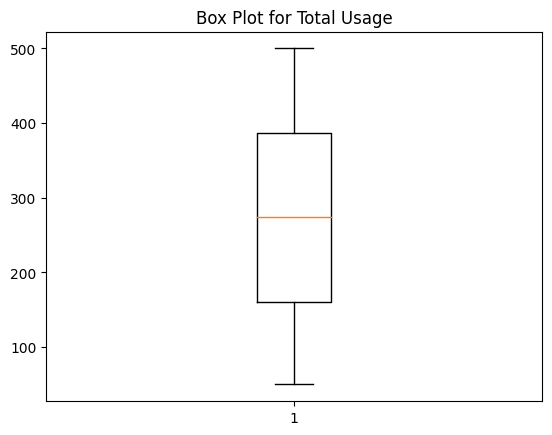

In [56]:
import matplotlib.pyplot as plt

plt.boxplot(df['Total_Usage_GB'])
plt.title("Box Plot for Total Usage")
plt.show()

In [57]:
pip install seaborn

You should consider upgrading via the 'c:\users\foram\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


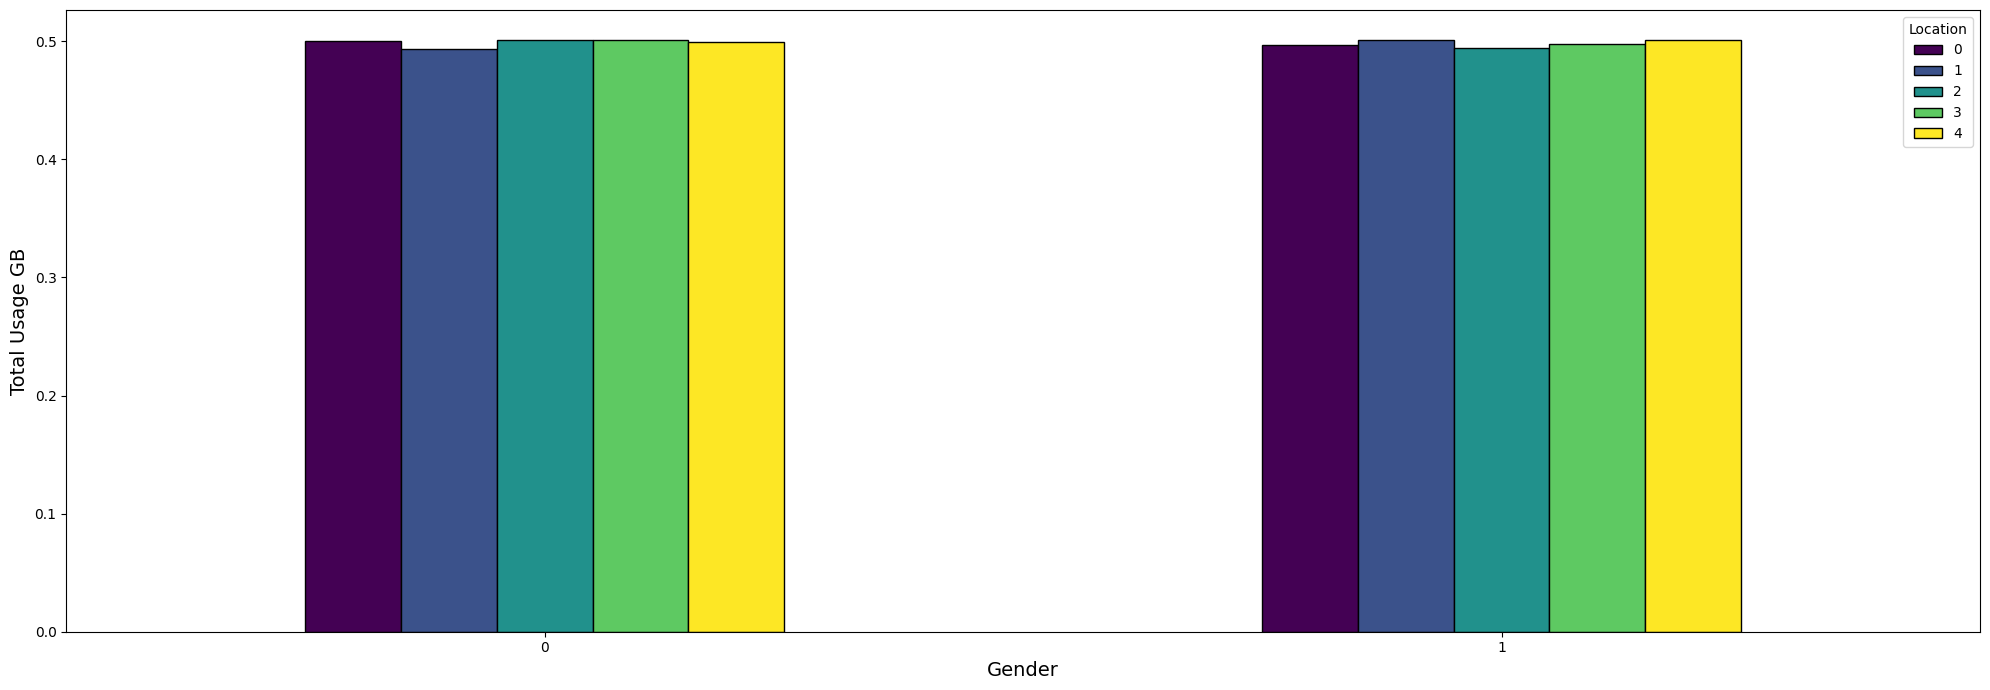

In [97]:
avg = df.groupby(["Gender", "Location"])["Total_Usage_GB"].mean().unstack()
plt.figure(figsize=(20, 7))
avg.plot(kind='bar', ax=plt.gca(), colormap='viridis', edgecolor='black')
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Total Usage GB", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Location")
plt.tight_layout()

plt.show()

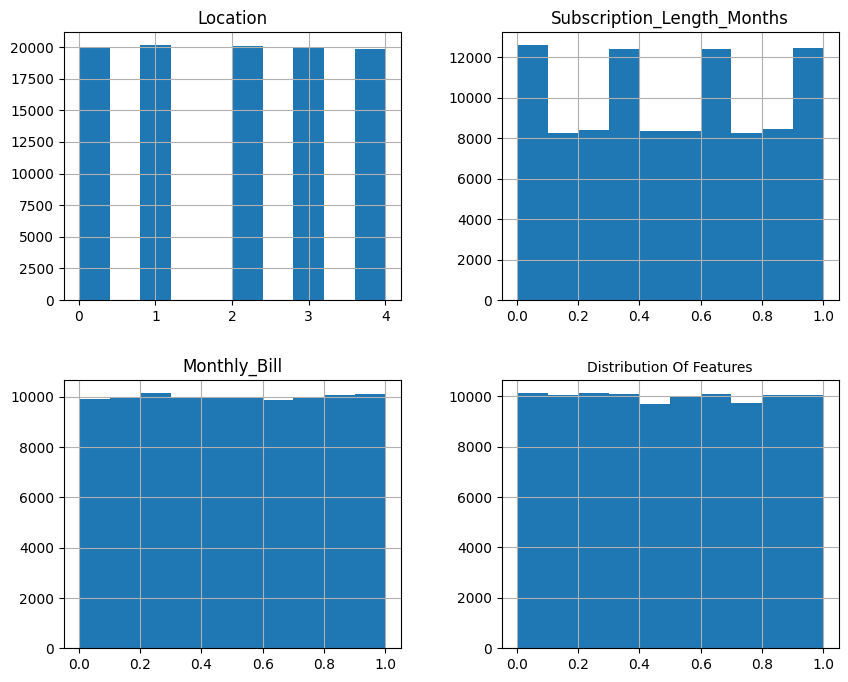

In [90]:
features = ['Age','Location','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB',]
df[features].hist(figsize=(10,8))
plt.title("Distribution Of Features" , fontsize=10)
plt.show()

Text(0.5, 1.0, 'Relashionship with target variable')

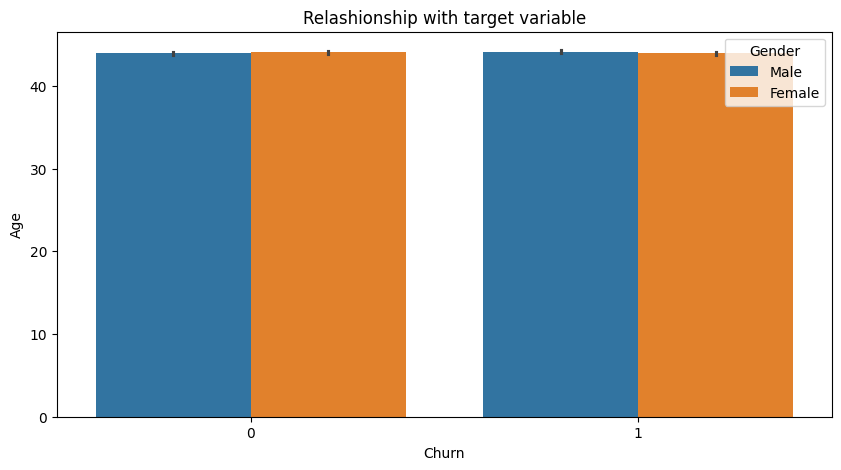

In [59]:
plt.figure(figsize=(10,5))
x1=sns.barplot(x=df["Churn"],y=df["Age"],hue=df["Gender"])
x1.set_title("Relashionship with target variable")

In [60]:
df.duplicated()
#NO DUPLICATE DATA

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [61]:
df.drop('CustomerID', axis=1, inplace=True)
df.drop('Name',axis=1,inplace=True)

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
encoder=LabelEncoder()
print(df.columns)

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')


In [63]:
df['Gender']=encoder.fit_transform(df['Gender'])
df['Location']=encoder.fit_transform(df['Location'])

In [64]:
#Creating bins for age
bins = [0, 18, 30, 45, 100]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [65]:
age_mapping = {'Young': 0, 'Adult': 1, 'Middle-aged': 2, 'Senior': 3}
df['Age'] = df['Age'].map(age_mapping)


In [66]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,3,1,2,17,73.36,236,0
1,3,0,4,1,48.76,172,0
2,1,0,2,5,85.47,460,0
3,2,0,3,3,97.94,297,1
4,3,0,3,19,58.14,266,0


In [67]:
#  convert subscription length to years:
df['Subscription_Length_Years'] = df['Subscription_Length_Months'] / 12


In [68]:
#  calculate total monthly cost:
df['Total_Monthly_Cost'] = df['Monthly_Bill'] * df['Subscription_Length_Months']


In [69]:
# calculate monthly usage per year:
df['Monthly_Usage_Per_Year'] = df['Total_Usage_GB'] / df['Subscription_Length_Years']


In [70]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Subscription_Length_Years,Total_Monthly_Cost,Monthly_Usage_Per_Year
0,3,1,2,17,73.36,236,0,1.416667,1247.12,166.588235
1,3,0,4,1,48.76,172,0,0.083333,48.76,2064.000000
2,1,0,2,5,85.47,460,0,0.416667,427.35,1104.000000
3,2,0,3,3,97.94,297,1,0.250000,293.82,1188.000000
4,3,0,3,19,58.14,266,0,1.583333,1104.66,168.000000


In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']] = scaler.fit_transform(df[['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']])


In [72]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Subscription_Length_Years,Total_Monthly_Cost,Monthly_Usage_Per_Year
0,3,1,2,0.695652,0.619429,0.413333,0,1.416667,1247.12,166.588235
1,3,0,4,0.000000,0.268000,0.271111,0,0.083333,48.76,2064.000000
2,1,0,2,0.173913,0.792429,0.911111,0,0.416667,427.35,1104.000000
3,2,0,3,0.086957,0.970571,0.548889,1,0.250000,293.82,1188.000000
4,3,0,3,0.782609,0.402000,0.480000,0,1.583333,1104.66,168.000000


In [74]:
X=df.drop(columns=['Churn'],axis=1)
display(X)
Y=df['Churn']

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Subscription_Length_Years,Total_Monthly_Cost,Monthly_Usage_Per_Year
0,3,1,2,0.695652,0.619429,0.413333,1.416667,1247.12,166.588235
1,3,0,4,0.000000,0.268000,0.271111,0.083333,48.76,2064.000000
2,1,0,2,0.173913,0.792429,0.911111,0.416667,427.35,1104.000000
3,2,0,3,0.086957,0.970571,0.548889,0.250000,293.82,1188.000000
4,3,0,3,0.782609,0.402000,0.480000,1.583333,1104.66,168.000000
...,...,...,...,...,...,...,...,...,...
99995,2,1,1,0.956522,0.359000,0.391111,1.916667,1267.99,117.913043
99996,3,0,4,0.782609,0.452143,0.668889,1.583333,1171.35,221.684211
99997,3,1,0,0.695652,0.944429,0.446667,1.416667,1633.87,177.176471
99998,3,0,4,0.826087,0.275000,0.853333,1.666667,985.00,260.400000


In [75]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=40)

In [76]:
print(X.shape,X_train.shape,X_test.shape)

(100000, 9) (80000, 9) (20000, 9)


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,r2_score,classification_report,confusion_matrix
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train, Y_train)
y_pred = logistic_model.predict(X_test)
print(classification_report(Y_test,y_pred))
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      9975
           1       0.00      0.00      0.00     10025

    accuracy                           0.50     20000
   macro avg       0.25      0.50      0.33     20000
weighted avg       0.25      0.50      0.33     20000

Accuracy: 0.49875


c:\users\foram\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\foram\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\foram\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [81]:
from sklearn.model_selection import cross_val_score

# Assuming you already have a logistic regression model and data (X, Y)
scores = cross_val_score(logistic_model, X, Y, cv=10, scoring='accuracy')  # 5-fold cross-validation

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.5052 0.5022 0.5051 0.4972 0.5022 0.5042 0.5022 0.5022 0.5022 0.5022]
Mean Accuracy: 0.5024900000000001


In [82]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Best Accuracy: 0.502475


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, Y_train)
y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

print(classification_report(Y_test,y_pred))

Accuracy: 0.50745
Precision: 0.5091675447839832
Recall: 0.4819950124688279
F1 Score: 0.4952088137330259
Confusion Matrix:
[[5317 4658]
 [5193 4832]]
              precision    recall  f1-score   support

           0       0.51      0.53      0.52      9975
           1       0.51      0.48      0.50     10025

    accuracy                           0.51     20000
   macro avg       0.51      0.51      0.51     20000
weighted avg       0.51      0.51      0.51     20000



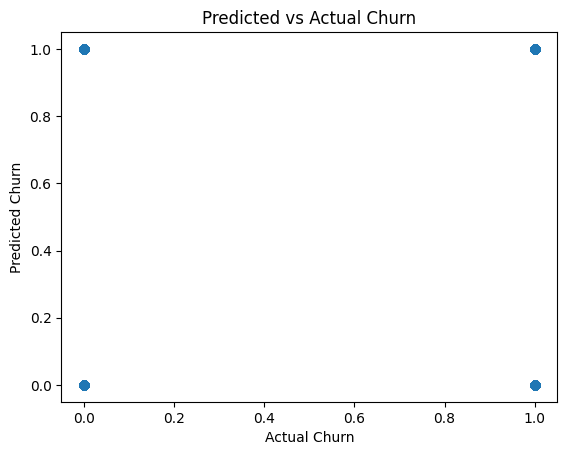

Accuracy: 0.5022
              precision    recall  f1-score   support

           0       0.50      0.56      0.53      9975
           1       0.50      0.45      0.47     10025

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [96]:
import xgboost as xg
X_train['Age'] = X_train['Age'].astype(int)
X_test['Age'] = X_test['Age'].astype(int)
params = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
xgm = xg.XGBClassifier(**params)
xgm.fit(X_train, Y_train)
y_pred = xgm.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual Churn')
plt.ylabel('Predicted Churn')
plt.title('Predicted vs Actual Churn')
plt.show()
print(f"Accuracy: {accuracy}")
print(classification_report(Y_test,y_pred))


In [99]:
import pickle

In [100]:
pickle.dump(xgm,open('model.pkl','wb'))

In [101]:
model=pickle.load(open('model.pkl','rb'))

In [105]:
data = pd.DataFrame({
    'Age': [1],
    'Gender': [1],
    'Location': [2],
    'Subscription_Length_Months': [12],
    'Monthly_Bill': [50.0],
    'Total_Usage_GB': [300],
    'Subscription_Length_Years':[1.34],
    'Total_Monthly_Cost':[1104.66], 
    'Monthly_Usage_Per_Year':[168]
})

In [106]:
predictions = model.predict(data)

# The 'predictions' variable now contains the model's predictions for the input data
print(predictions)

[1]


In [1]:
from IPython.display import FileLink
file_path = 'ML_Internship_SunBase.ipynb'
FileLink(file_path)


C:\Users\FORAM\ML_Internship_SunBase.ipynb